Reading in the data and extracting the important lines

In [47]:
import pandas as pd
import scipy.stats as stats

demographic_df = pd.read_csv("Individual Project Demographic survey.csv")
demographic_df = demographic_df.iloc[2:, 17:]

condition_df = pd.read_csv("Individual Project Condition Survey.csv")
condition_df = condition_df.iloc[2:, 17:]

closing_df = pd.read_csv("Individual Project End Survey.csv")
closing_df = closing_df.iloc[2:, 17:]

Plotting an age distribution graph for visual understanding

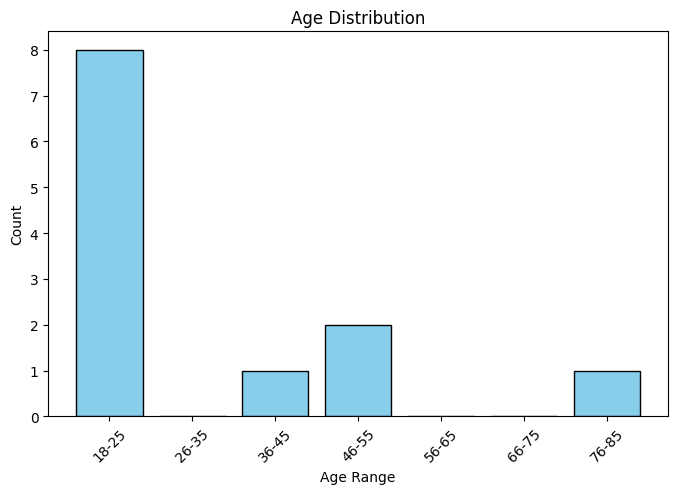

In [48]:
import matplotlib.pyplot as plt

# Convert column 3 to numeric, handling errors
demographic_df.iloc[:, 2] = pd.to_numeric(demographic_df.iloc[:, 2], errors="coerce")

# Drop rows where conversion failed
df = demographic_df.dropna(subset=[demographic_df.columns[2]])

# Define age bins and labels
bins = [18, 25, 35, 45, 55, 65, 75, 85]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76-85"]

# Bin the age data
df["Age Group"] = pd.cut(df.iloc[:, 2], bins=bins, labels=labels, right=True)

# Count occurrences in each age group
age_counts = df["Age Group"].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(age_counts.index, age_counts.values, color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.xticks(rotation=45)

# Show plot
plt.show()

Average Age of participant

In [49]:
import numpy as np

ages = demographic_df.iloc[:, 2] 
mean_age = np.mean(ages).round()
mode_age = ages.mode().iloc[0]
median_age = ages.median()
std_age = ages.std()

print("Mean Age: " + str(mean_age))
print("Mode Age: " + str(mode_age))
print("Median Age: " + str(median_age))
print("Standard Deviation: " + str(std_age))
print("Oldest Participant: " + str(ages.max()))
print("Youngest Participant: " + str(ages.min()))

Mean Age: 32.0
Mode Age: 21
Median Age: 21.0
Standard Deviation: 18.72508445585194
Oldest Participant: 76
Youngest Participant: 19


Plotting a graph to visualise the gender distribution

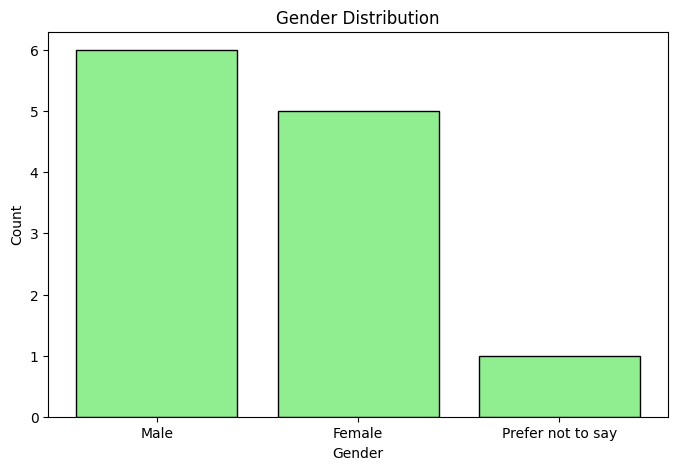

In [50]:
# Count occurrences of each gender category in column 4
gender_counts = demographic_df.iloc[:, 3].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(gender_counts.index, gender_counts.values, color="lightgreen", edgecolor="black")

# Labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
# Keep x-axis labels horizontal
plt.xticks(rotation=0)

# Show plot
plt.show()

Plotting graph for experience levels with AR for participants

In [51]:
AR_experience = demographic_df["Q5"]
art_experience = demographic_df["Q6"]
# Manual assignment of the levels for the experience
AR_experience_fixed = ["Experience", "None", "None", "None", "Experience", "None", "None", "None", "None", "Experience", "Experience", "None"]
art_experience_fixed = ["Novice", "Novice", "Average", "Novice", "Novice", "Novice", "Novice", "Average", "Expert", "Novice", "Average", "Average"]

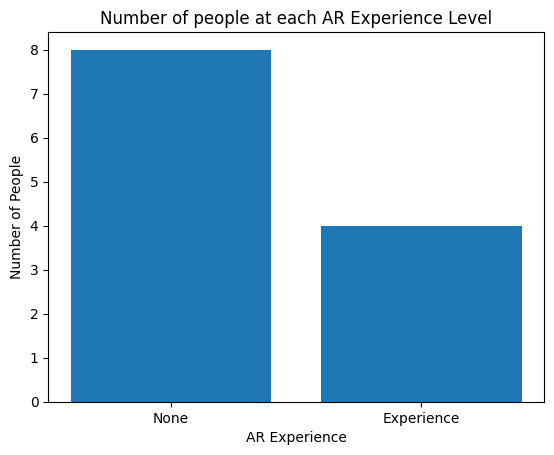

In [52]:
# Count the occurrences of each option
AR_experience_set = list(set(AR_experience_fixed))  # Convert set to list to preserve ordering
AR_experience_counts = [AR_experience_fixed.count(option) for option in AR_experience_set]

# Create a bar graph
plt.bar(AR_experience_set, AR_experience_counts)

# Labeling the graph
plt.xlabel('AR Experience')
plt.ylabel('Number of People')
plt.title('Number of people at each AR Experience Level')

# Display the graph
plt.show()

Plotting graph for experience levels with art for participants

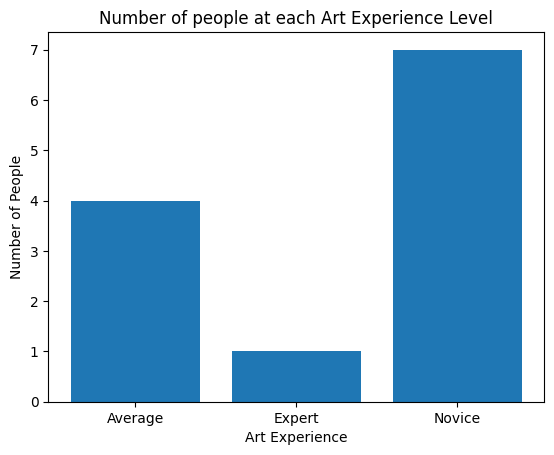

In [53]:
# Count the occurrences of each option
art_experience_set = list(set(art_experience_fixed))  # Convert set to list to preserve ordering
art_experience_counts = [art_experience_fixed.count(option) for option in art_experience_set]

# Create a bar graph
plt.bar(art_experience_set, art_experience_counts)

# Labeling the graph
plt.xlabel('Art Experience')
plt.ylabel('Number of People')
plt.title('Number of people at each Art Experience Level')

# Display the graph
plt.show()

Average Excitement by condition

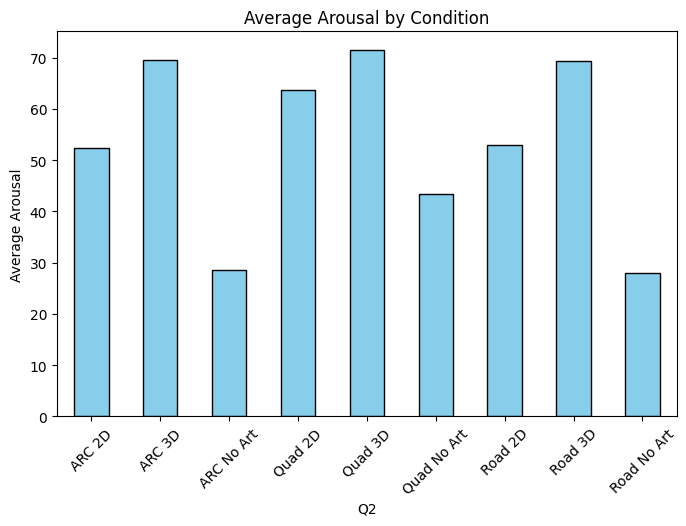

In [54]:
# Convert column 3 to numeric, handling errors
condition_df.iloc[:, 2] = pd.to_numeric(condition_df.iloc[:, 2], errors="coerce")

# Drop rows where conversion failed
condition_df = condition_df.dropna(subset=[condition_df.columns[2]])

# Group by condition and calculate the average arousal
average_values = condition_df.groupby(condition_df.columns[1])[condition_df.columns[2]].mean()

# Plot the bar chart
plt.figure(figsize=(8, 5))
average_values.plot(kind='bar', color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel(condition_df.columns[1])
plt.ylabel("Average Arousal")
plt.title("Average Arousal by Condition")
plt.xticks(rotation=45)

# Show plot
plt.show()

Average Enjoyability by Condition

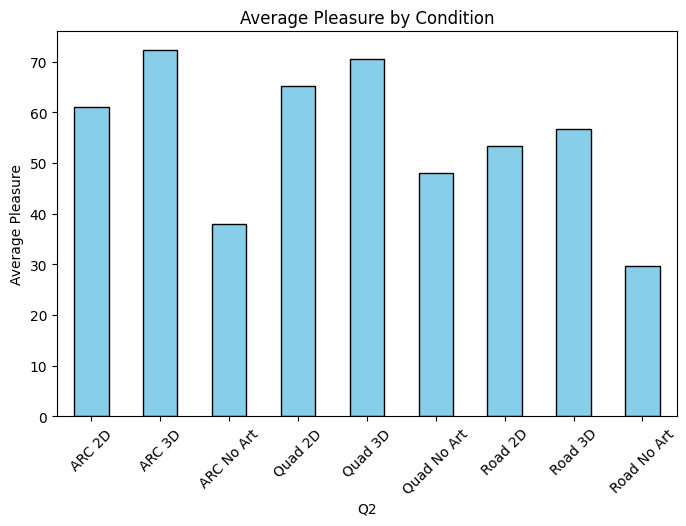

In [55]:
# Convert column 4 to numeric, handling errors
condition_df.iloc[:, 3] = pd.to_numeric(condition_df.iloc[:, 3], errors="coerce")

# Drop rows where conversion failed
condition_df = condition_df.dropna(subset=[condition_df.columns[3]])

# Group by conditions and calculate the average of pleasure
average_values = condition_df.groupby(condition_df.columns[1])[condition_df.columns[3]].mean()

# Plot the bar chart
plt.figure(figsize=(8, 5))
average_values.plot(kind='bar', color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel(condition_df.columns[1])
plt.ylabel("Average Pleasure")
plt.title("Average Pleasure by Condition")
plt.xticks(rotation=45)

# Show plot
plt.show()

Combined confidence intervals for all conditions with arousal and pleasure

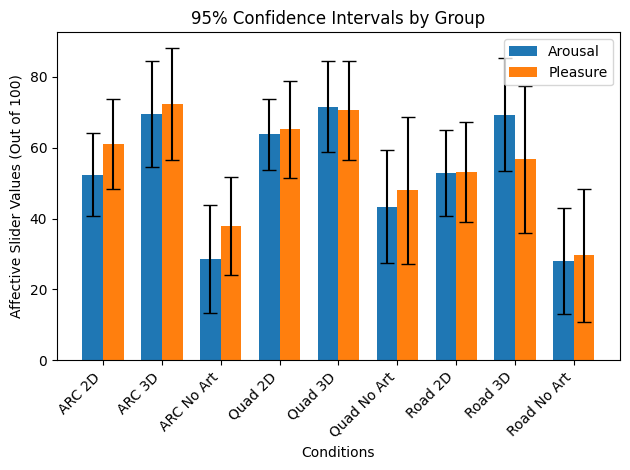

Group ARC 2D: Q3_1 95% CI: (np.float64(40.68707098833546), np.float64(64.14626234499787)), Q4_1 95% CI: (np.float64(48.32441454799709), np.float64(73.67558545200292))
Group ARC 3D: Q3_1 95% CI: (np.float64(54.64242385776225), np.float64(84.35757614223775)), Q4_1 95% CI: (np.float64(56.53984244075225), np.float64(88.1268242259144))
Group ARC No Art: Q3_1 95% CI: (np.float64(13.357442116013782), np.float64(43.809224550652885)), Q4_1 95% CI: (np.float64(23.974132448699038), np.float64(51.85920088463429))
Group Quad 2D: Q3_1 95% CI: (np.float64(53.73639707479682), np.float64(73.76360292520319)), Q4_1 95% CI: (np.float64(51.548035900041214), np.float64(78.78529743329213))
Group Quad 3D: Q3_1 95% CI: (np.float64(58.791145530377705), np.float64(84.37552113628895)), Q4_1 95% CI: (np.float64(56.61187493779176), np.float64(84.55479172887489))
Group Quad No Art: Q3_1 95% CI: (np.float64(27.341251831649643), np.float64(59.32541483501703)), Q4_1 95% CI: (np.float64(27.173023592654477), np.float64(6

In [56]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    return mean - margin_of_error, mean + margin_of_error

# Ensure numeric columns are converted to float
condition_df["Q3_1"] = condition_df["Q3_1"].astype(float)
condition_df["Q4_1"] = condition_df["Q4_1"].astype(float)

# Group by Q2 and compute confidence intervals for Q3_1 and Q4_1
results = {}
groups = []
means_q3 = []
means_q4 = []
errors_q3 = []
errors_q4 = []

for group, subset in condition_df.groupby("Q2"):
    ci_q3 = confidence_interval(subset["Q3_1"])
    ci_q4 = confidence_interval(subset["Q4_1"])
    results[group] = {"Q3_1_CI": ci_q3, "Q4_1_CI": ci_q4}
    
    groups.append(group)
    means_q3.append(np.mean(subset["Q3_1"]))
    means_q4.append(np.mean(subset["Q4_1"]))
    errors_q3.append((ci_q3[1] - ci_q3[0]) / 2)
    errors_q4.append((ci_q4[1] - ci_q4[0]) / 2)

# Plot confidence intervals
x = np.arange(len(groups))  # x locations for the groups
width = 0.35  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means_q3, width, yerr=errors_q3, label='Arousal', capsize=5)
rects2 = ax.bar(x + width/2, means_q4, width, yerr=errors_q4, label='Pleasure', capsize=5)

ax.set_xlabel('Conditions')
ax.set_ylabel('Affective Slider Values (Out of 100)')
ax.set_title('95% Confidence Intervals by Group')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

# Print results
for group, ci in results.items():
    print(f"Group {group}: Q3_1 95% CI: {ci['Q3_1_CI']}, Q4_1 95% CI: {ci['Q4_1_CI']}")

95% confidence intervals for arousal and pleasure seperately

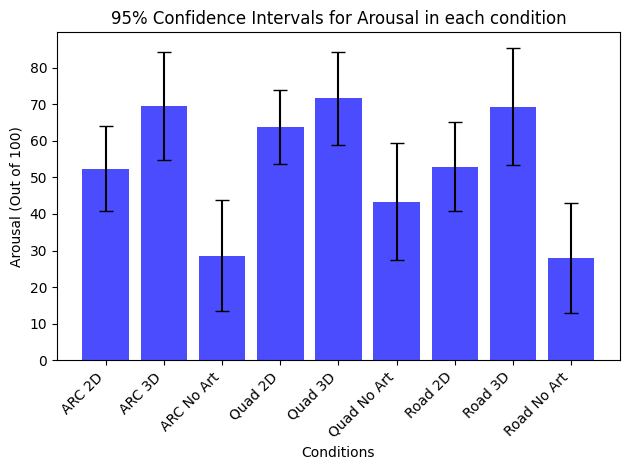

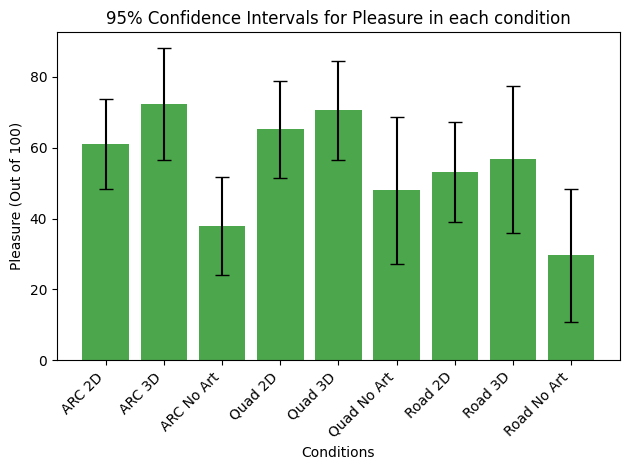

In [57]:
# Plot confidence intervals for Q3_1
x = np.arange(len(groups))  # x locations for the groups

fig, ax = plt.subplots()
ax.bar(x, means_q3, yerr=errors_q3, capsize=5, color='blue', alpha=0.7)
ax.set_xlabel('Conditions')
ax.set_ylabel('Arousal (Out of 100)')
ax.set_title('95% Confidence Intervals for Arousal in each condition')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plot confidence intervals for Q4_1
fig, ax = plt.subplots()
ax.bar(x, means_q4, yerr=errors_q4, capsize=5, color='green', alpha=0.7)
ax.set_xlabel('Conditions')
ax.set_ylabel('Pleasure (Out of 100)')
ax.set_title('95% Confidence Intervals for Pleasure in each condition')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=45, ha="right")
plt.tight_layout()
plt.show()

Combined 95% confidence intervals for arousal and pleasure when grouped by art type

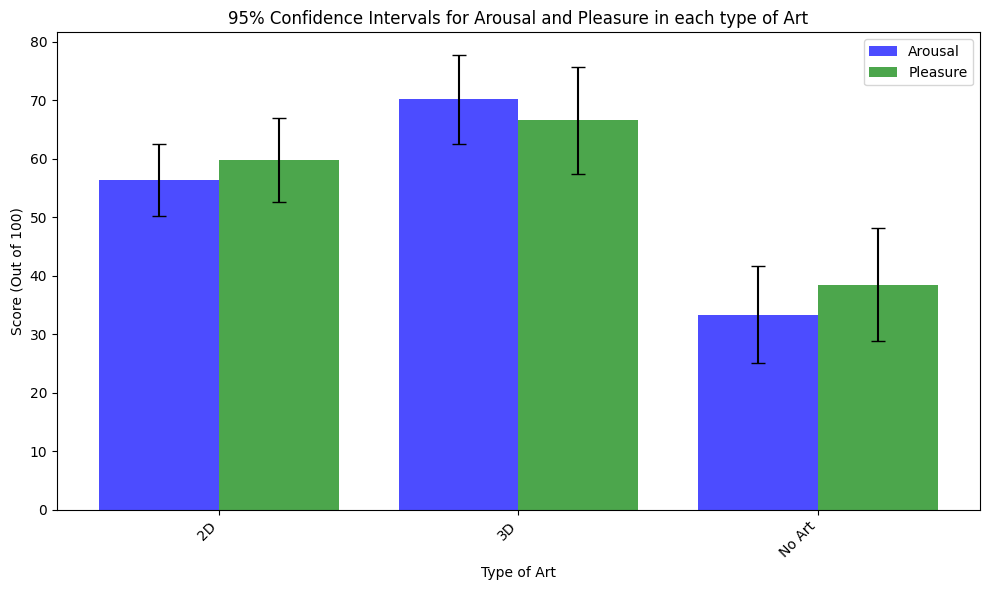

In [58]:
# Ensure numeric columns are converted to float
condition_df["Q3_1"] = condition_df["Q3_1"].astype(float)
condition_df["Q4_1"] = condition_df["Q4_1"].astype(float)

# Create a new column grouping by 2D, 3D, No Art
condition_df["Q2_Grouped"] = condition_df["Q2"].str.extract(r'(2D|3D|No Art)$')

# Group by the new Q2_Grouped column
results = {}
groups = []
means_q3 = []
means_q4 = []
errors_q3 = []
errors_q4 = []



for group, subset in condition_df.groupby("Q2_Grouped"):
    # Assuming confidence_interval function is already defined elsewhere
    ci_q3 = confidence_interval(subset["Q3_1"])  # Confidence interval for Arousal (Q3_1)
    ci_q4 = confidence_interval(subset["Q4_1"])  # Confidence interval for Pleasure (Q4_1)
    
    results[group] = {"Q3_1_CI": ci_q3, "Q4_1_CI": ci_q4}
    
    groups.append(group)
    means_q3.append(np.mean(subset["Q3_1"]))
    means_q4.append(np.mean(subset["Q4_1"]))
    errors_q3.append((ci_q3[1] - ci_q3[0]) / 2)
    errors_q4.append((ci_q4[1] - ci_q4[0]) / 2)

# Plot combined confidence intervals for Q3_1 (Arousal) and Q4_1 (Pleasure)
x = np.arange(len(groups))  # x locations for the groups

fig, ax = plt.subplots(figsize=(10, 6))

# Plot for Arousal (Q3_1) - Blue bars
ax.bar(x - 0.2, means_q3, yerr=errors_q3, capsize=5, color='blue', alpha=0.7, width=0.4, label='Arousal')

# Plot for Pleasure (Q4_1) - Green bars
ax.bar(x + 0.2, means_q4, yerr=errors_q4, capsize=5, color='green', alpha=0.7, width=0.4, label='Pleasure')

# Add labels and title
ax.set_xlabel('Type of Art')
ax.set_ylabel('Score (Out of 100)')
ax.set_title('95% Confidence Intervals for Arousal and Pleasure in each type of Art')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=45, ha="right")

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

Individual 95% confidence intervals for the arousal and pleasure grouped by art type

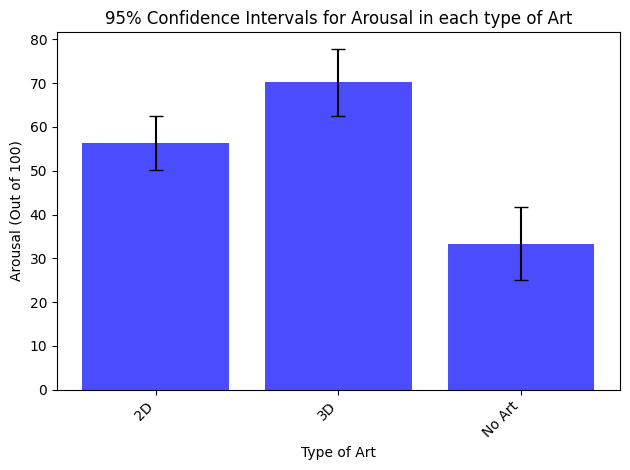

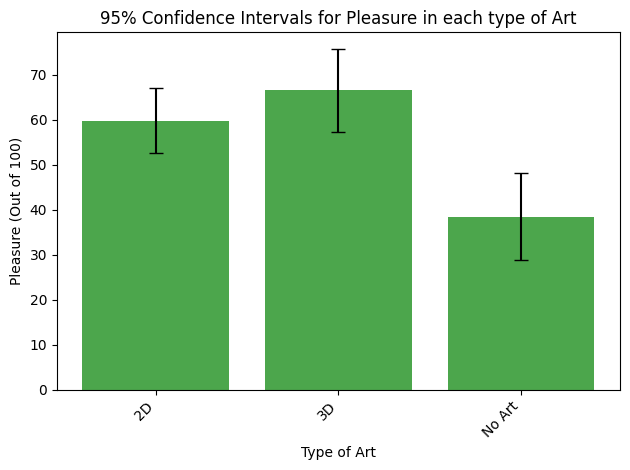

In [59]:
# Ensure numeric columns are converted to float
condition_df["Q3_1"] = condition_df["Q3_1"].astype(float)
condition_df["Q4_1"] = condition_df["Q4_1"].astype(float)

# Create a new column grouping by 2D, 3D, No Art
condition_df["Q2_Grouped"] = condition_df["Q2"].str.extract(r'(2D|3D|No Art)$')

# Group by the new Q2_Grouped column
results = {}
groups = []
means_q3 = []
means_q4 = []
errors_q3 = []
errors_q4 = []

for group, subset in condition_df.groupby("Q2_Grouped"):
    ci_q3 = confidence_interval(subset["Q3_1"])
    ci_q4 = confidence_interval(subset["Q4_1"])
    results[group] = {"Q3_1_CI": ci_q3, "Q4_1_CI": ci_q4}
    
    groups.append(group)
    means_q3.append(np.mean(subset["Q3_1"]))
    means_q4.append(np.mean(subset["Q4_1"]))
    errors_q3.append((ci_q3[1] - ci_q3[0]) / 2)
    errors_q4.append((ci_q4[1] - ci_q4[0]) / 2)

# Plot confidence intervals for Q3_1
x = np.arange(len(groups))  # x locations for the groups

fig, ax = plt.subplots()
ax.bar(x, means_q3, yerr=errors_q3, capsize=5, color='blue', alpha=0.7)
ax.set_xlabel('Type of Art')
ax.set_ylabel('Arousal (Out of 100)')
ax.set_title('95% Confidence Intervals for Arousal in each type of Art')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plot confidence intervals for Q4_1
fig, ax = plt.subplots()
ax.bar(x, means_q4, yerr=errors_q4, capsize=5, color='green', alpha=0.7)
ax.set_xlabel('Type of Art')
ax.set_ylabel('Pleasure (Out of 100)')
ax.set_title('95% Confidence Intervals for Pleasure in each type of Art')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=45, ha="right")
plt.tight_layout()
plt.show()

Combined 95% confidence interval for arousal and pleasure grouped by Location

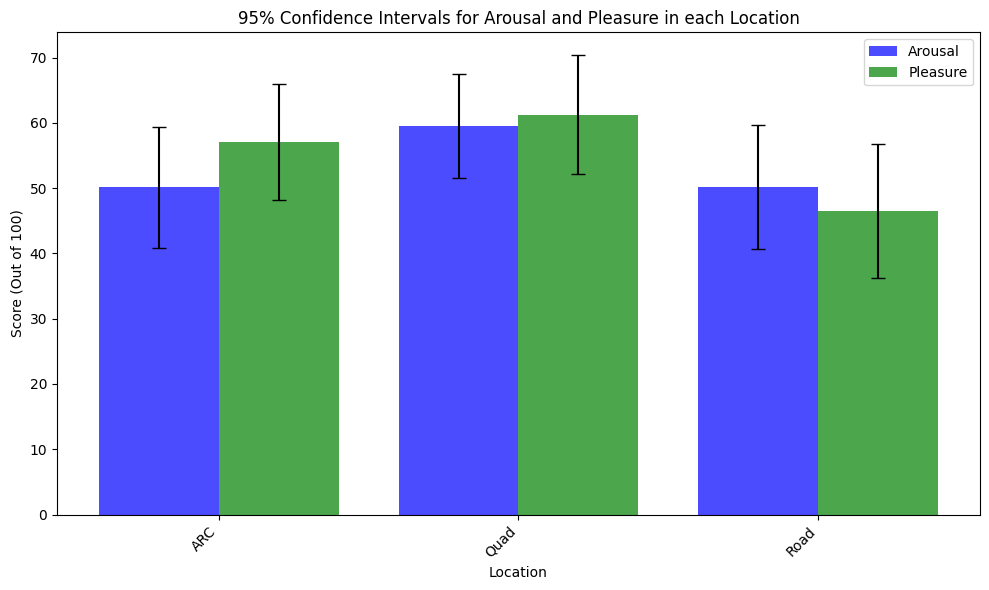

In [60]:
# Ensure numeric columns are converted to float
condition_df["Q3_1"] = condition_df["Q3_1"].astype(float)
condition_df["Q4_1"] = condition_df["Q4_1"].astype(float)

# Create a new column grouping by 2D, 3D, No Art
condition_df["Q2_Grouped"] = condition_df["Q2"].str.extract(r'^(ARC|Quad|Road)')

# Group by the new Q2_Grouped column
results = {}
groups = []
means_q3 = []
means_q4 = []
errors_q3 = []
errors_q4 = []

for group, subset in condition_df.groupby("Q2_Grouped"):
    # Assuming confidence_interval function is already defined elsewhere
    ci_q3 = confidence_interval(subset["Q3_1"])  # Confidence interval for Arousal (Q3_1)
    ci_q4 = confidence_interval(subset["Q4_1"])  # Confidence interval for Pleasure (Q4_1)
    
    results[group] = {"Q3_1_CI": ci_q3, "Q4_1_CI": ci_q4}
    
    groups.append(group)
    means_q3.append(np.mean(subset["Q3_1"]))
    means_q4.append(np.mean(subset["Q4_1"]))
    errors_q3.append((ci_q3[1] - ci_q3[0]) / 2)
    errors_q4.append((ci_q4[1] - ci_q4[0]) / 2)

# Plot combined confidence intervals for Q3_1 (Arousal) and Q4_1 (Pleasure)
x = np.arange(len(groups))  # x locations for the groups

fig, ax = plt.subplots(figsize=(10, 6))

# Plot for Arousal (Q3_1) - Blue bars
ax.bar(x - 0.2, means_q3, yerr=errors_q3, capsize=5, color='blue', alpha=0.7, width=0.4, label='Arousal')

# Plot for Pleasure (Q4_1) - Green bars
ax.bar(x + 0.2, means_q4, yerr=errors_q4, capsize=5, color='green', alpha=0.7, width=0.4, label='Pleasure')

# Add labels and title
ax.set_xlabel('Location')
ax.set_ylabel('Score (Out of 100)')
ax.set_title('95% Confidence Intervals for Arousal and Pleasure in each Location')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=45, ha="right")

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

Individual 95% confidence intervals for arousal and pleasure grouped by location

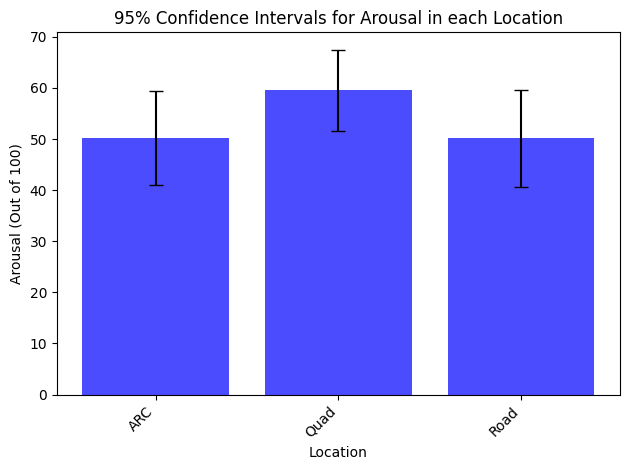

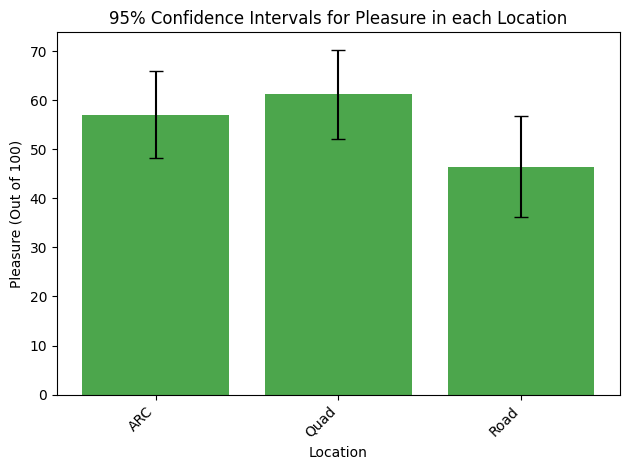

In [61]:
# Ensure numeric columns are converted to float
condition_df["Q3_1"] = condition_df["Q3_1"].astype(float)
condition_df["Q4_1"] = condition_df["Q4_1"].astype(float)

# Create a new column grouping by 2D, 3D, No Art
condition_df["Q2_Grouped"] = condition_df["Q2"].str.extract(r'^(ARC|Quad|Road)')

# Group by the new Q2_Grouped column
results = {}
groups = []
means_q3 = []
means_q4 = []
errors_q3 = []
errors_q4 = []

for group, subset in condition_df.groupby("Q2_Grouped"):
    ci_q3 = confidence_interval(subset["Q3_1"])
    ci_q4 = confidence_interval(subset["Q4_1"])
    results[group] = {"Q3_1_CI": ci_q3, "Q4_1_CI": ci_q4}
    
    groups.append(group)
    means_q3.append(np.mean(subset["Q3_1"]))
    means_q4.append(np.mean(subset["Q4_1"]))
    errors_q3.append((ci_q3[1] - ci_q3[0]) / 2)
    errors_q4.append((ci_q4[1] - ci_q4[0]) / 2)

# Plot confidence intervals for Q3_1
x = np.arange(len(groups))  # x locations for the groups

fig, ax = plt.subplots()
ax.bar(x, means_q3, yerr=errors_q3, capsize=5, color='blue', alpha=0.7)
ax.set_xlabel('Location')
ax.set_ylabel('Arousal (Out of 100)')
ax.set_title('95% Confidence Intervals for Arousal in each Location')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plot confidence intervals for Q4_1
fig, ax = plt.subplots()
ax.bar(x, means_q4, yerr=errors_q4, capsize=5, color='green', alpha=0.7)
ax.set_xlabel('Location')
ax.set_ylabel('Pleasure (Out of 100)')
ax.set_title('95% Confidence Intervals for Pleasure in each Location')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=45, ha="right")
plt.tight_layout()
plt.show()

Stacked bar graph for Likert scale for Finding the Space Visually Interesting

C:\Users\aiden\AppData\Local\Temp\ipykernel_7536\767388932.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors


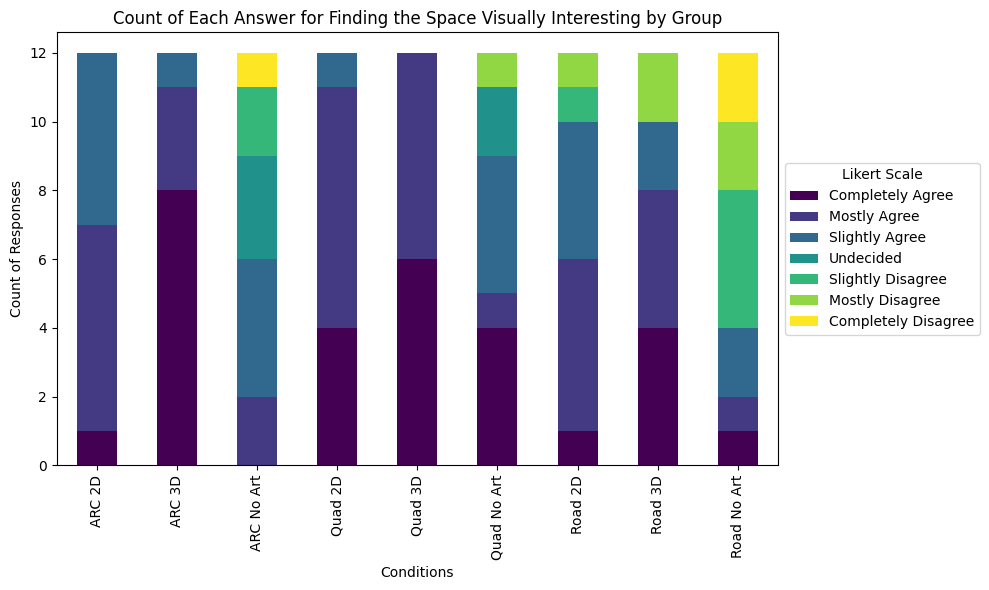

In [62]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Define the custom Likert scale order
likert_order = [
    "Completely Agree",
    "Mostly Agree",
    "Slightly Agree",
    "Undecided",
    "Slightly Disagree",
    "Mostly Disagree",
    "Completely Disagree"
]

# Group by 'Q2' and 'Q5_1' and count occurrences
likert_counts = condition_df.groupby(['Q2', 'Q5_1']).size().unstack(fill_value=0)

# Reindex the columns to match the specified Likert order
likert_counts = likert_counts.reindex(columns=likert_order, fill_value=0)

# Generate colors from the Viridis colormap
viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors
custom_colors = [mcolors.rgb2hex(viridis(i)) for i in range(7)]  # Convert to hex

# Plotting the results as a bar chart
ax = likert_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('Count of Responses')
ax.set_title('Count of Each Answer for Finding the Space Visually Interesting by Group')
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

Stacked bar graph for Likert scale question for The Space Being Too Visually Busy

C:\Users\aiden\AppData\Local\Temp\ipykernel_7536\2965433758.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors


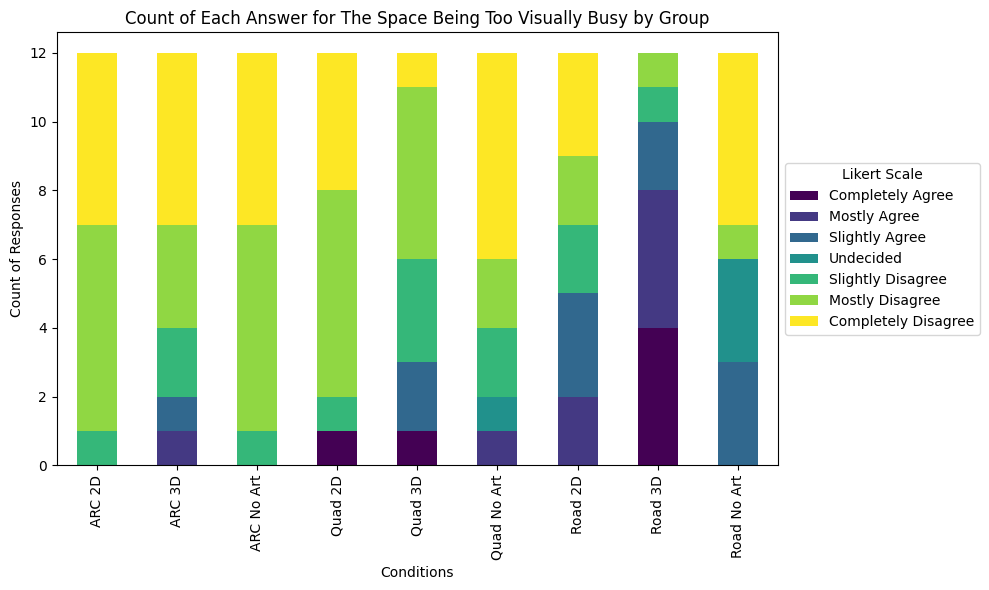

In [63]:
# Group by 'Q2' and 'Q5_2' and count occurrences
likert_counts = condition_df.groupby(['Q2', 'Q5_2']).size().unstack(fill_value=0)

# Reindex the columns to match the specified Likert order
likert_counts = likert_counts.reindex(columns=likert_order, fill_value=0)

# Generate colors from the Viridis colormap
viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors
custom_colors = [mcolors.rgb2hex(viridis(i)) for i in range(7)]  # Convert to hex

# Plotting the results as a bar chart
ax = likert_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('Count of Responses')
ax.set_title('Count of Each Answer for The Space Being Too Visually Busy by Group')
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

Stacked bar graphs for the Likert scale for Enjoying the Look/Feel of the Space

C:\Users\aiden\AppData\Local\Temp\ipykernel_7536\2742222273.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors


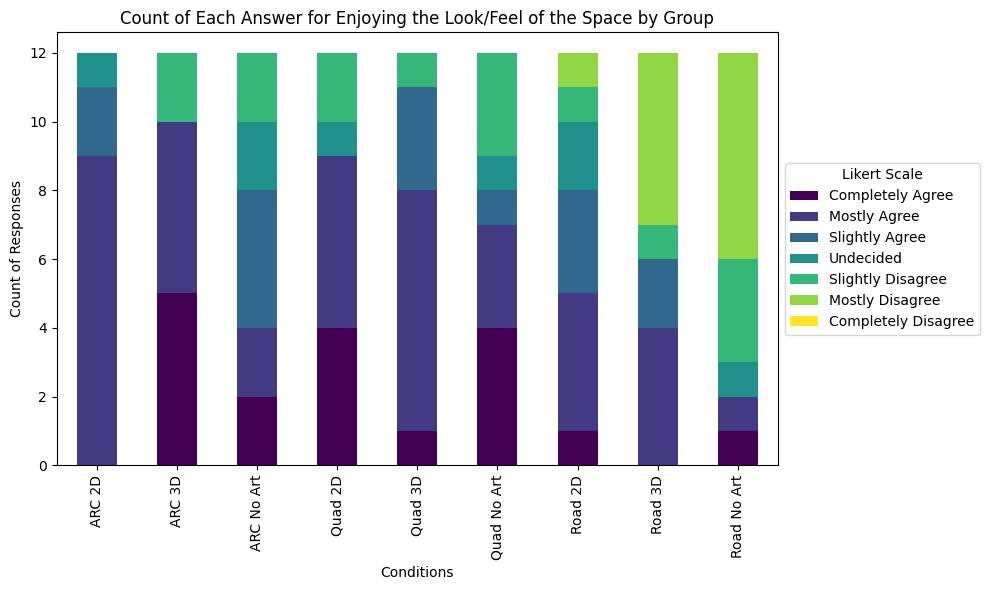

In [64]:
# Group by 'Q2' and 'Q5_3' and count occurrences
likert_counts = condition_df.groupby(['Q2', 'Q5_3']).size().unstack(fill_value=0)

# Reindex the columns to match the specified Likert order
likert_counts = likert_counts.reindex(columns=likert_order, fill_value=0)

# Generate colors from the Viridis colormap
viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors
custom_colors = [mcolors.rgb2hex(viridis(i)) for i in range(7)]  # Convert to hex

# Plotting the results as a bar chart
ax = likert_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('Count of Responses')
ax.set_title('Count of Each Answer for Enjoying the Look/Feel of the Space by Group')
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

Stacked bar graph for the Likert scale question for The Space Being Memorable

C:\Users\aiden\AppData\Local\Temp\ipykernel_7536\4151954586.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors


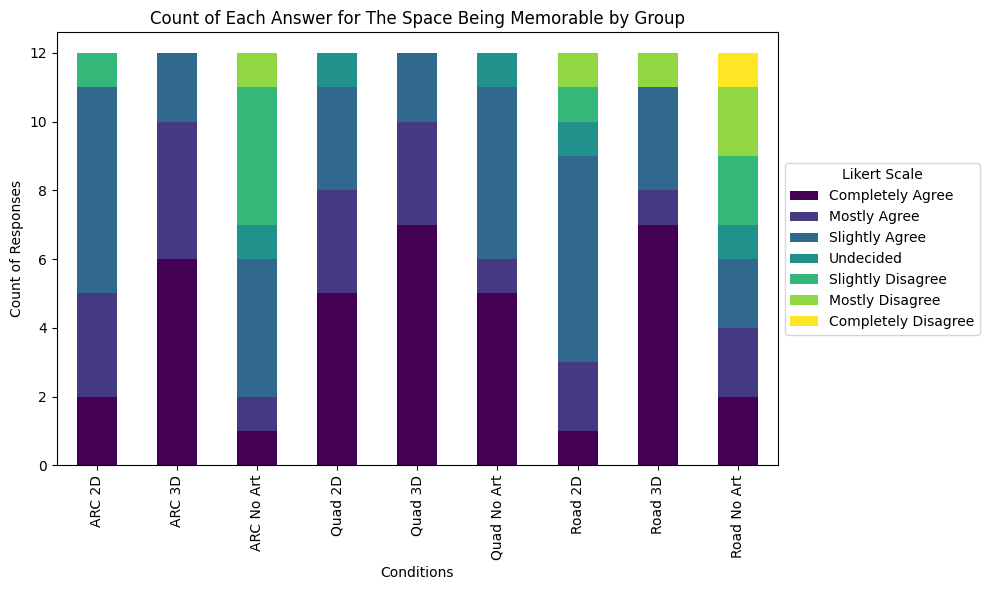

In [65]:
# Group by 'Q2' and 'Q5_4' and count occurrences
likert_counts = condition_df.groupby(['Q2', 'Q5_4']).size().unstack(fill_value=0)

# Reindex the columns to match the specified Likert order
likert_counts = likert_counts.reindex(columns=likert_order, fill_value=0)

# Generate colors from the Viridis colormap
viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors
custom_colors = [mcolors.rgb2hex(viridis(i)) for i in range(7)]  # Convert to hex

# Plotting the results as a bar chart
ax = likert_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('Count of Responses')
ax.set_title('Count of Each Answer for The Space Being Memorable by Group')
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

Stacked bar graph for the Likert scale question for The Space Being Visually Harmonious

C:\Users\aiden\AppData\Local\Temp\ipykernel_7536\383597650.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors


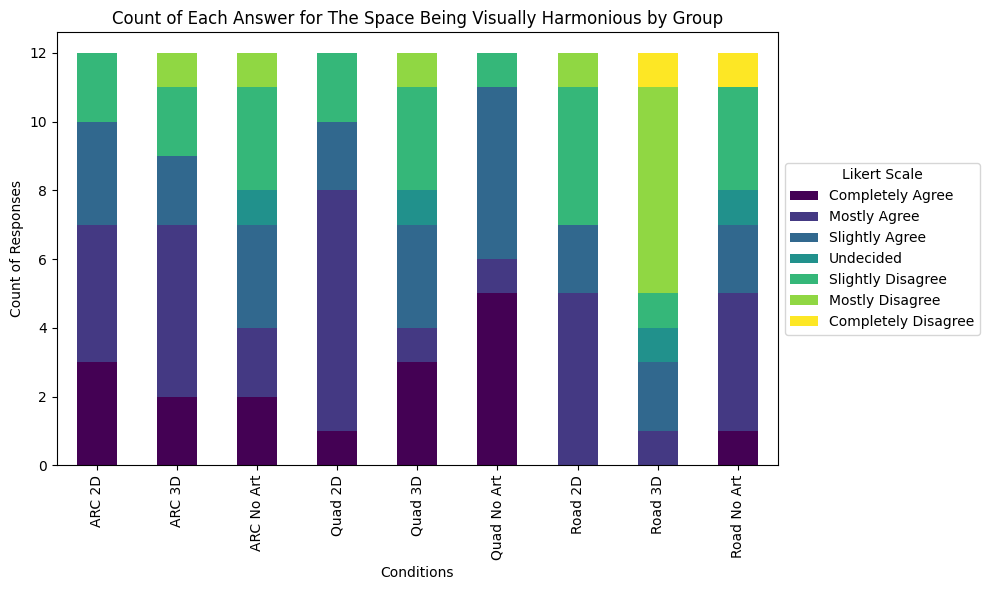

In [66]:
# Group by 'Q2' and 'Q5_5' and count occurrences
likert_counts = condition_df.groupby(['Q2', 'Q5_5']).size().unstack(fill_value=0)

# Reindex the columns to match the specified Likert order
likert_counts = likert_counts.reindex(columns=likert_order, fill_value=0)

# Generate colors from the Viridis colormap
viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors
custom_colors = [mcolors.rgb2hex(viridis(i)) for i in range(7)]  # Convert to hex

# Plotting the results as a bar chart
ax = likert_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('Count of Responses')
ax.set_title('Count of Each Answer for The Space Being Visually Harmonious by Group')
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

Stacked bar graph for the Likert Scale question for The Art Being a Natural Addition to the Space

C:\Users\aiden\AppData\Local\Temp\ipykernel_7536\4250449562.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors


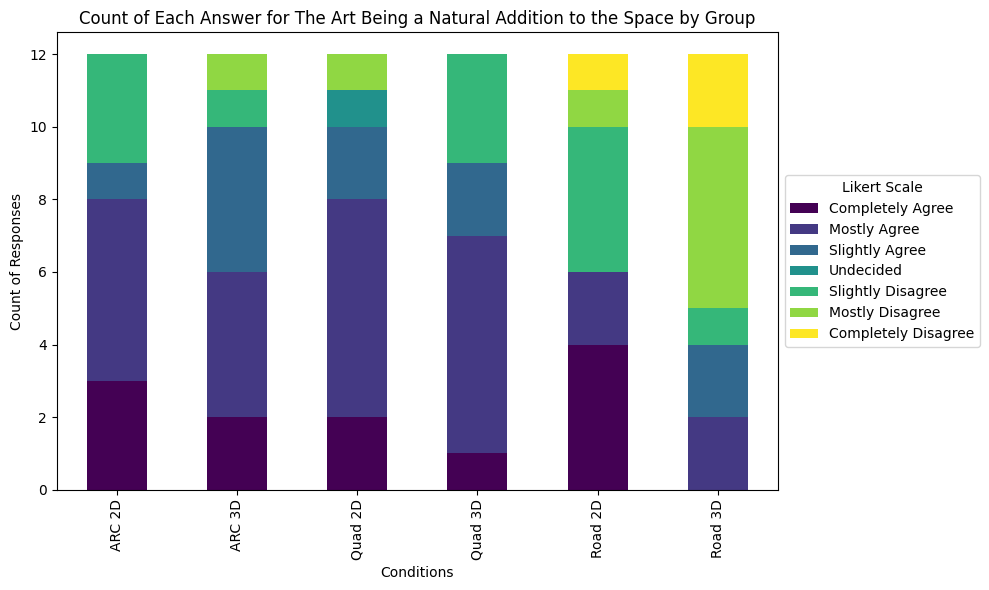

In [67]:
# Group by 'Q2' and 'Q6_1' and count occurrences
likert_counts = condition_df.groupby(['Q2', 'Q6_1']).size().unstack(fill_value=0)

# Reindex the columns to match the specified Likert order
likert_counts = likert_counts.reindex(columns=likert_order, fill_value=0)

# Generate colors from the Viridis colormap
viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors
custom_colors = [mcolors.rgb2hex(viridis(i)) for i in range(7)]  # Convert to hex

# Plotting the results as a bar chart
ax = likert_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('Count of Responses')
ax.set_title('Count of Each Answer for The Art Being a Natural Addition to the Space by Group')
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

Stacked bar graph for the Likert scale question for The Art Being Positioned Appropriately

C:\Users\aiden\AppData\Local\Temp\ipykernel_7536\2210978840.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors


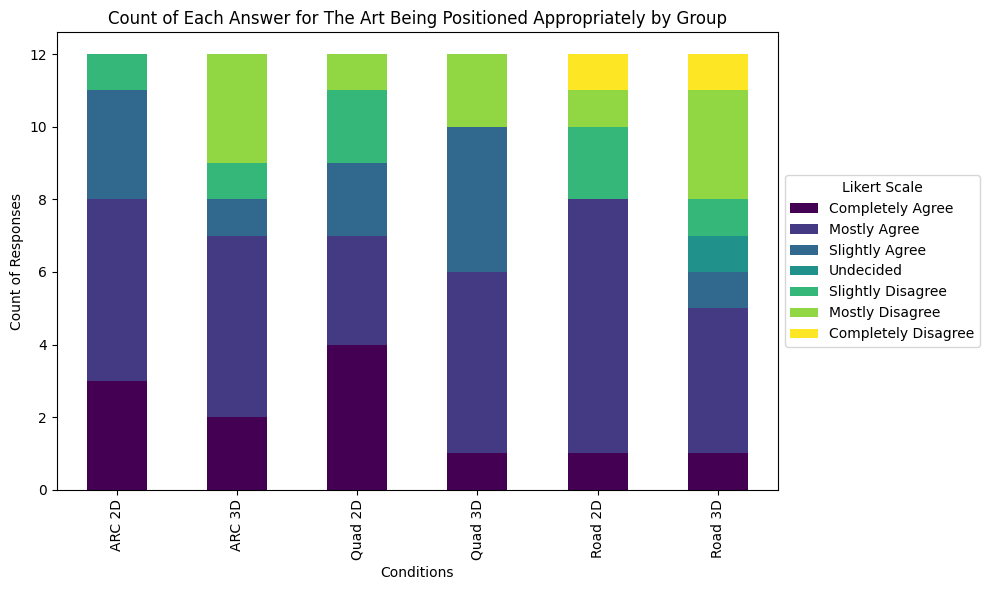

In [68]:
# Group by 'Q2' and 'Q6_2' and count occurrences
likert_counts = condition_df.groupby(['Q2', 'Q6_2']).size().unstack(fill_value=0)

# Reindex the columns to match the specified Likert order
likert_counts = likert_counts.reindex(columns=likert_order, fill_value=0)

# Generate colors from the Viridis colormap
viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors
custom_colors = [mcolors.rgb2hex(viridis(i)) for i in range(7)]  # Convert to hex

# Plotting the results as a bar chart
ax = likert_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('Count of Responses')
ax.set_title('Count of Each Answer for The Art Being Positioned Appropriately by Group')
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

Stacked bar graph for the Likert scale question for The Art Being Appropriately Sized

C:\Users\aiden\AppData\Local\Temp\ipykernel_7536\1361986671.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors


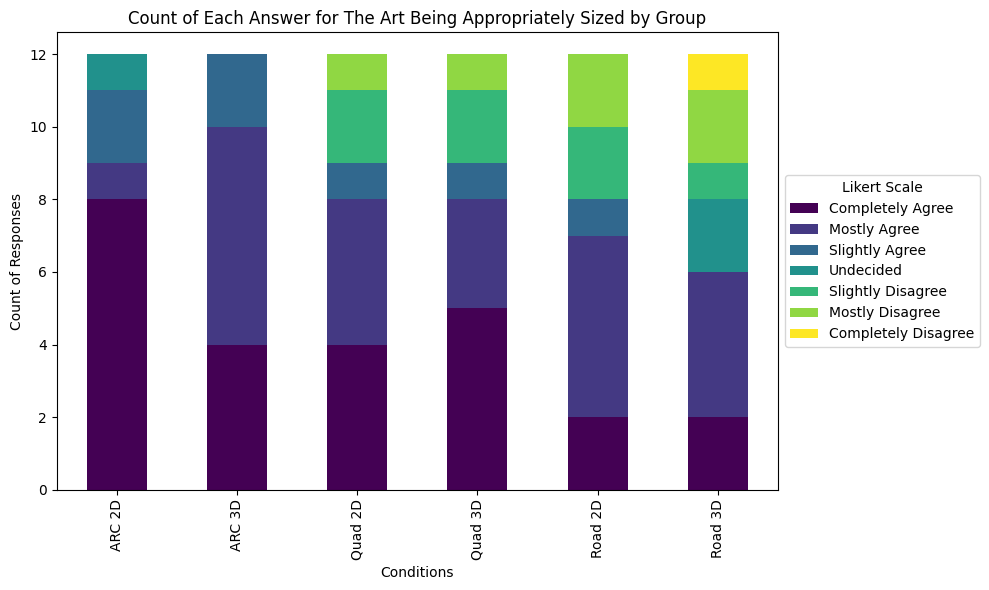

In [69]:
# Group by 'Q2' and 'Q6_3' and count occurrences
likert_counts = condition_df.groupby(['Q2', 'Q6_3']).size().unstack(fill_value=0)

# Reindex the columns to match the specified Likert order
likert_counts = likert_counts.reindex(columns=likert_order, fill_value=0)

# Generate colors from the Viridis colormap
viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors
custom_colors = [mcolors.rgb2hex(viridis(i)) for i in range(7)]  # Convert to hex

# Plotting the results as a bar chart
ax = likert_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('Count of Responses')
ax.set_title('Count of Each Answer for The Art Being Appropriately Sized by Group')
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

Stacked bar graph for the Likert scale question for Feeling the Art Was Really There in the Physical Space

C:\Users\aiden\AppData\Local\Temp\ipykernel_7536\722134185.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors


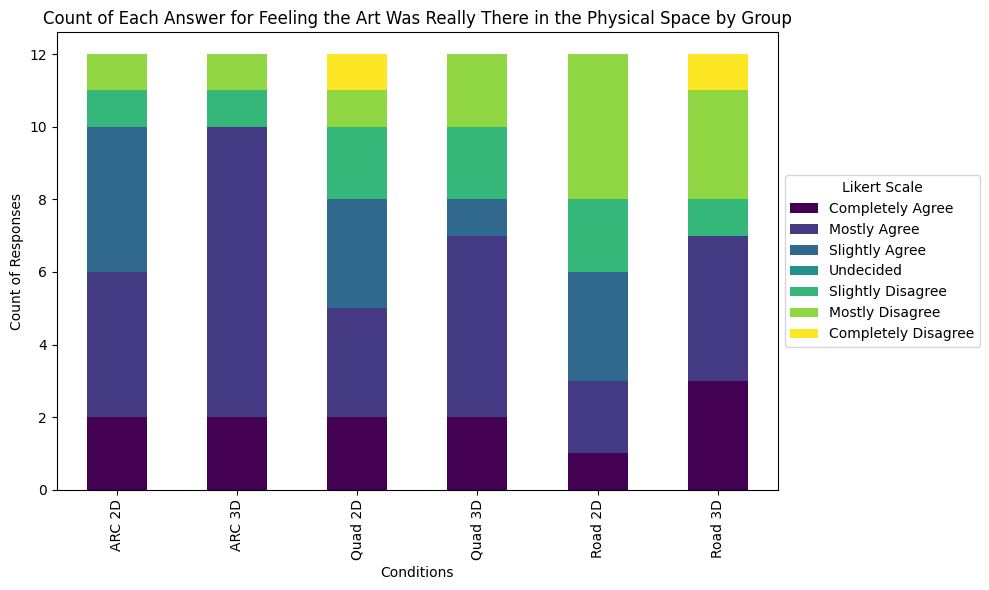

In [70]:
# Group by 'Q2' and 'Q6_4' and count occurrences
likert_counts = condition_df.groupby(['Q2', 'Q6_4']).size().unstack(fill_value=0)

# Reindex the columns to match the specified Likert order
likert_counts = likert_counts.reindex(columns=likert_order, fill_value=0)

# Generate colors from the Viridis colormap
viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors
custom_colors = [mcolors.rgb2hex(viridis(i)) for i in range(7)]  # Convert to hex

# Plotting the results as a bar chart
ax = likert_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('Count of Responses')
ax.set_title('Count of Each Answer for Feeling the Art Was Really There in the Physical Space by Group')
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

Stacked bar graph for the Likert scale question for Feeling That the Art Was Realistic

C:\Users\aiden\AppData\Local\Temp\ipykernel_7536\1828913512.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors


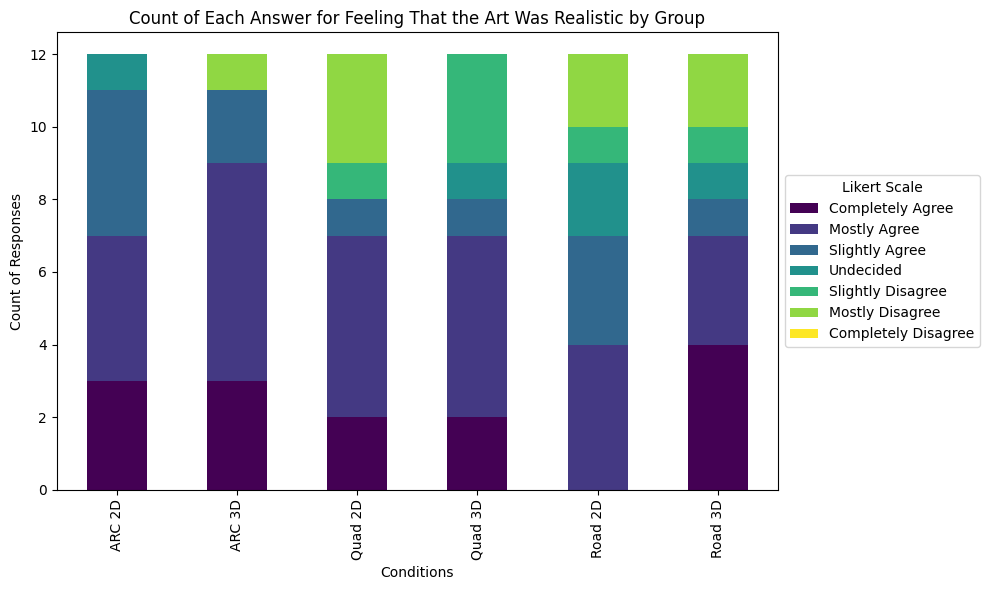

In [71]:
# Group by 'Q2' and 'Q6_5' and count occurrences
likert_counts = condition_df.groupby(['Q2', 'Q6_5']).size().unstack(fill_value=0)

# Reindex the columns to match the specified Likert order
likert_counts = likert_counts.reindex(columns=likert_order, fill_value=0)

# Generate colors from the Viridis colormap
viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors
custom_colors = [mcolors.rgb2hex(viridis(i)) for i in range(7)]  # Convert to hex

# Plotting the results as a bar chart
ax = likert_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('Count of Responses')
ax.set_title('Count of Each Answer for Feeling That the Art Was Realistic by Group')
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

Stacked bar graphs for the Likert scale question for Feeling the Visual Clarity/Fidelity of the Models Was Sufficient

C:\Users\aiden\AppData\Local\Temp\ipykernel_7536\3811265131.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors


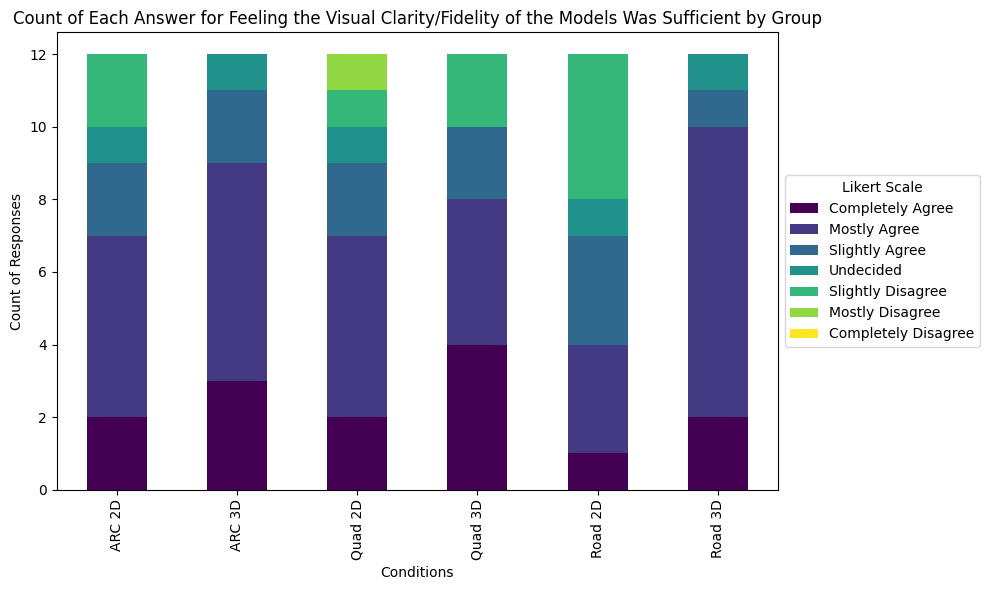

In [72]:
# Group by 'Q2' and 'Q6_6' and count occurrences
likert_counts = condition_df.groupby(['Q2', 'Q6_6']).size().unstack(fill_value=0)

# Reindex the columns to match the specified Likert order
likert_counts = likert_counts.reindex(columns=likert_order, fill_value=0)

# Generate colors from the Viridis colormap
viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors
custom_colors = [mcolors.rgb2hex(viridis(i)) for i in range(7)]  # Convert to hex

# Plotting the results as a bar chart
ax = likert_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('Count of Responses')
ax.set_title('Count of Each Answer for Feeling the Visual Clarity/Fidelity of the Models Was Sufficient by Group')
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

Stacked bar graphs for the Likert scale question for Feeling the Lighting/Shading of the Models Was Appropriate for the Space

C:\Users\aiden\AppData\Local\Temp\ipykernel_7536\2454349663.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors


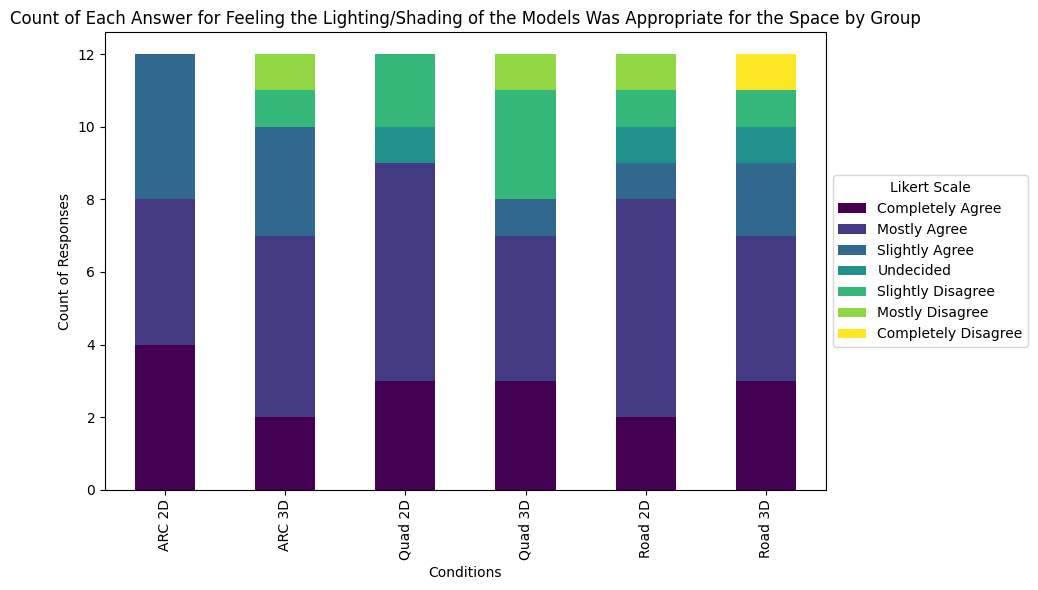

In [73]:
# Group by 'Q2' and 'Q6_7' and count occurrences
likert_counts = condition_df.groupby(['Q2', 'Q6_7']).size().unstack(fill_value=0)

# Reindex the columns to match the specified Likert order
likert_counts = likert_counts.reindex(columns=likert_order, fill_value=0)

# Generate colors from the Viridis colormap
viridis = cm.get_cmap('viridis', 7)  # Get 7 evenly spaced colors
custom_colors = [mcolors.rgb2hex(viridis(i)) for i in range(7)]  # Convert to hex

# Plotting the results as a bar chart
ax = likert_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('Count of Responses')
ax.set_title('Count of Each Answer for Feeling the Lighting/Shading of the Models Was Appropriate for the Space by Group')
ax.legend(title='Likert Scale', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

Table versions of the counts for each of the first set of Likert scale questions

In [74]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Expand width to fit
pd.set_option('display.max_colwidth', None)  # Show full content of each cell

# Assuming 'condition_df' is your DataFrame
# Likert scale columns from Q5_1 to Q5_5
likert_columns = ['Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5']

# Group by Q2 (conditions)
grouped_likert_counts = pd.DataFrame()

for column in likert_columns:
    # Group by 'Q2' and count occurrences of each Likert response in the column
    counts = condition_df.groupby('Q2')[column].value_counts().unstack(fill_value=0)
    
    # Replace NaN with 0 in case any condition does not have a response for a particular Likert value
    counts = counts.fillna(0)
    
    # Rename columns to avoid duplicates by adding the column name as a prefix
    counts.columns = [f'{column}_{response}' for response in counts.columns]
    
    # Merge this counts DataFrame into the final one
    if grouped_likert_counts.empty:
        grouped_likert_counts = counts
    else:
        grouped_likert_counts = pd.merge(grouped_likert_counts, counts, left_index=True, right_index=True, how='outer')

# Display the final grouped counts table
print(grouped_likert_counts)


             Q5_1_Completely Agree  Q5_1_Completely Disagree  \
Q2                                                             
ARC 2D                           1                         0   
ARC 3D                           8                         0   
ARC No Art                       0                         1   
Quad 2D                          4                         0   
Quad 3D                          6                         0   
Quad No Art                      4                         0   
Road 2D                          1                         0   
Road 3D                          4                         0   
Road No Art                      1                         2   

             Q5_1_Mostly Agree  Q5_1_Mostly Disagree  Q5_1_Slightly Agree  \
Q2                                                                          
ARC 2D                       6                     0                    5   
ARC 3D                       3                     0            

Table versions of the counts of the second set of likert scale questions

In [75]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Expand width to fit
pd.set_option('display.max_colwidth', None)  # Show full content of each cell

# Assuming 'condition_df' is your DataFrame
# Likert scale columns from Q5_1 to Q5_5
likert_columns = ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7']

# Group by Q2 (conditions)
grouped_likert_counts = pd.DataFrame()

for column in likert_columns:
    # Group by 'Q2' and count occurrences of each Likert response in the column
    counts = condition_df.groupby('Q2')[column].value_counts().unstack(fill_value=0)
    
    # Replace NaN with 0 in case any condition does not have a response for a particular Likert value
    counts = counts.fillna(0)
    
    # Rename columns to avoid duplicates by adding the column name as a prefix
    counts.columns = [f'{column}_{response}' for response in counts.columns]
    
    # Merge this counts DataFrame into the final one
    if grouped_likert_counts.empty:
        grouped_likert_counts = counts
    else:
        grouped_likert_counts = pd.merge(grouped_likert_counts, counts, left_index=True, right_index=True, how='outer')

# Display the final grouped counts table
print(grouped_likert_counts)

         Q6_1_Completely Agree  Q6_1_Completely Disagree  Q6_1_Mostly Agree  \
Q2                                                                            
ARC 2D                       3                         0                  5   
ARC 3D                       2                         0                  4   
Quad 2D                      2                         0                  6   
Quad 3D                      1                         0                  6   
Road 2D                      4                         1                  2   
Road 3D                      0                         2                  2   

         Q6_1_Mostly Disagree  Q6_1_Slightly Agree  Q6_1_Slightly Disagree  \
Q2                                                                           
ARC 2D                      0                    1                       3   
ARC 3D                      1                    4                       1   
Quad 2D                     1                    2     

Table versions of the counts of the first set of likert scale questions grouped by Art type

In [76]:
# Assuming 'condition_df' is your DataFrame
# Likert scale columns from Q5_1 to Q5_5
likert_columns = ['Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5']

# Create a new column that groups Q2 based on suffixes
condition_df['Q2_Grouped'] = condition_df['Q2'].str.extract(r'(2D|3D|No Art)$')

# Group by the new 'Q2_Grouped' column
grouped_likert_counts = pd.DataFrame()

for column in likert_columns:
    # Group by 'Q2_Grouped' and count occurrences of each Likert response in the column
    counts = condition_df.groupby('Q2_Grouped')[column].value_counts().unstack(fill_value=0)
    
    # Replace NaN with 0 in case any condition does not have a response for a particular Likert value
    counts = counts.fillna(0)
    
    # Rename columns to avoid duplicates by adding the column name as a prefix
    counts.columns = [f'{column}_{response}' for response in counts.columns]
    
    # Merge this counts DataFrame into the final one
    if grouped_likert_counts.empty:
        grouped_likert_counts = counts
    else:
        grouped_likert_counts = pd.merge(grouped_likert_counts, counts, left_index=True, right_index=True, how='outer')

# Display the final grouped counts table
print(grouped_likert_counts)

            Q5_1_Completely Agree  Q5_1_Completely Disagree  \
Q2_Grouped                                                    
2D                              6                         0   
3D                             18                         0   
No Art                          5                         3   

            Q5_1_Mostly Agree  Q5_1_Mostly Disagree  Q5_1_Slightly Agree  \
Q2_Grouped                                                                 
2D                         18                     1                   10   
3D                         13                     2                    3   
No Art                      4                     3                   10   

            Q5_1_Slightly Disagree  Q5_1_Undecided  Q5_2_Completely Agree  \
Q2_Grouped                                                                  
2D                               1               0                      1   
3D                               0               0                      

Table versions of the counts of the second set of likert scale questions grouped by Art type

In [77]:
# Assuming 'condition_df' is your DataFrame
# Likert scale columns from Q5_1 to Q5_5
likert_columns = ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7']

# Create a new column that groups Q2 based on suffixes
condition_df['Q2_Grouped'] = condition_df['Q2'].str.extract(r'(2D|3D|No Art)$')

# Group by the new 'Q2_Grouped' column
grouped_likert_counts = pd.DataFrame()

for column in likert_columns:
    # Group by 'Q2_Grouped' and count occurrences of each Likert response in the column
    counts = condition_df.groupby('Q2_Grouped')[column].value_counts().unstack(fill_value=0)
    
    # Replace NaN with 0 in case any condition does not have a response for a particular Likert value
    counts = counts.fillna(0)
    
    # Rename columns to avoid duplicates by adding the column name as a prefix
    counts.columns = [f'{column}_{response}' for response in counts.columns]
    
    # Merge this counts DataFrame into the final one
    if grouped_likert_counts.empty:
        grouped_likert_counts = counts
    else:
        grouped_likert_counts = pd.merge(grouped_likert_counts, counts, left_index=True, right_index=True, how='outer')

# Display the final grouped counts table
print(grouped_likert_counts)

            Q6_1_Completely Agree  Q6_1_Completely Disagree  \
Q2_Grouped                                                    
2D                              9                         1   
3D                              3                         2   

            Q6_1_Mostly Agree  Q6_1_Mostly Disagree  Q6_1_Slightly Agree  \
Q2_Grouped                                                                 
2D                         13                     2                    3   
3D                         12                     6                    8   

            Q6_1_Slightly Disagree  Q6_1_Undecided  Q6_2_Completely Agree  \
Q2_Grouped                                                                  
2D                               7               1                      8   
3D                               5               0                      4   

            Q6_2_Completely Disagree  Q6_2_Mostly Agree  Q6_2_Mostly Disagree  \
Q2_Grouped                                          

Table versions of the counts of the first set of likert scale questions grouped by location

In [78]:
# Assuming 'condition_df' is your DataFrame
# Likert scale columns from Q5_1 to Q5_5
likert_columns = ['Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5']

# Create a new column that groups Q2 based on prefixes (ARC, Quad, or Road)
condition_df['Q2_Grouped'] = condition_df['Q2'].str.extract(r'^(ARC|Quad|Road)')

# Group by the new 'Q2_Grouped' column
grouped_likert_counts = pd.DataFrame()

for column in likert_columns:
    # Group by 'Q2_Grouped' and count occurrences of each Likert response in the column
    counts = condition_df.groupby('Q2_Grouped')[column].value_counts().unstack(fill_value=0)
    
    # Replace NaN with 0 in case any condition does not have a response for a particular Likert value
    counts = counts.fillna(0)
    
    # Rename columns to avoid duplicates by adding the column name as a prefix
    counts.columns = [f'{column}_{response}' for response in counts.columns]
    
    # Merge this counts DataFrame into the final one
    if grouped_likert_counts.empty:
        grouped_likert_counts = counts
    else:
        grouped_likert_counts = pd.merge(grouped_likert_counts, counts, left_index=True, right_index=True, how='outer')

# Display the final grouped counts table
print(grouped_likert_counts)

            Q5_1_Completely Agree  Q5_1_Completely Disagree  \
Q2_Grouped                                                    
ARC                             9                         1   
Quad                           14                         0   
Road                            6                         2   

            Q5_1_Mostly Agree  Q5_1_Mostly Disagree  Q5_1_Slightly Agree  \
Q2_Grouped                                                                 
ARC                        11                     0                   10   
Quad                       14                     1                    5   
Road                       10                     5                    8   

            Q5_1_Slightly Disagree  Q5_1_Undecided  Q5_2_Completely Agree  \
Q2_Grouped                                                                  
ARC                              2               3                      0   
Quad                             0               2                      

Table versions of the counts of the second set of likert scale questions grouped by location

In [79]:
# Assuming 'condition_df' is your DataFrame
# Likert scale columns from Q5_1 to Q5_5
likert_columns = ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7']

# Create a new column that groups Q2 based on prefixes (ARC, Quad, or Road)
condition_df['Q2_Grouped'] = condition_df['Q2'].str.extract(r'^(ARC|Quad|Road)')

# Group by the new 'Q2_Grouped' column
grouped_likert_counts = pd.DataFrame()

for column in likert_columns:
    # Group by 'Q2_Grouped' and count occurrences of each Likert response in the column
    counts = condition_df.groupby('Q2_Grouped')[column].value_counts().unstack(fill_value=0)
    
    # Replace NaN with 0 in case any condition does not have a response for a particular Likert value
    counts = counts.fillna(0)
    
    # Rename columns to avoid duplicates by adding the column name as a prefix
    counts.columns = [f'{column}_{response}' for response in counts.columns]
    
    # Merge this counts DataFrame into the final one
    if grouped_likert_counts.empty:
        grouped_likert_counts = counts
    else:
        grouped_likert_counts = pd.merge(grouped_likert_counts, counts, left_index=True, right_index=True, how='outer')

# Display the final grouped counts table
print(grouped_likert_counts)

            Q6_1_Completely Agree  Q6_1_Completely Disagree  \
Q2_Grouped                                                    
ARC                             5                         0   
Quad                            3                         0   
Road                            4                         3   

            Q6_1_Mostly Agree  Q6_1_Mostly Disagree  Q6_1_Slightly Agree  \
Q2_Grouped                                                                 
ARC                         9                     1                    5   
Quad                       12                     1                    4   
Road                        4                     6                    2   

            Q6_1_Slightly Disagree  Q6_1_Undecided  Q6_2_Completely Agree  \
Q2_Grouped                                                                  
ARC                              4               0                      5   
Quad                             3               1                      

Stacked bar graphs for the ranking of art types

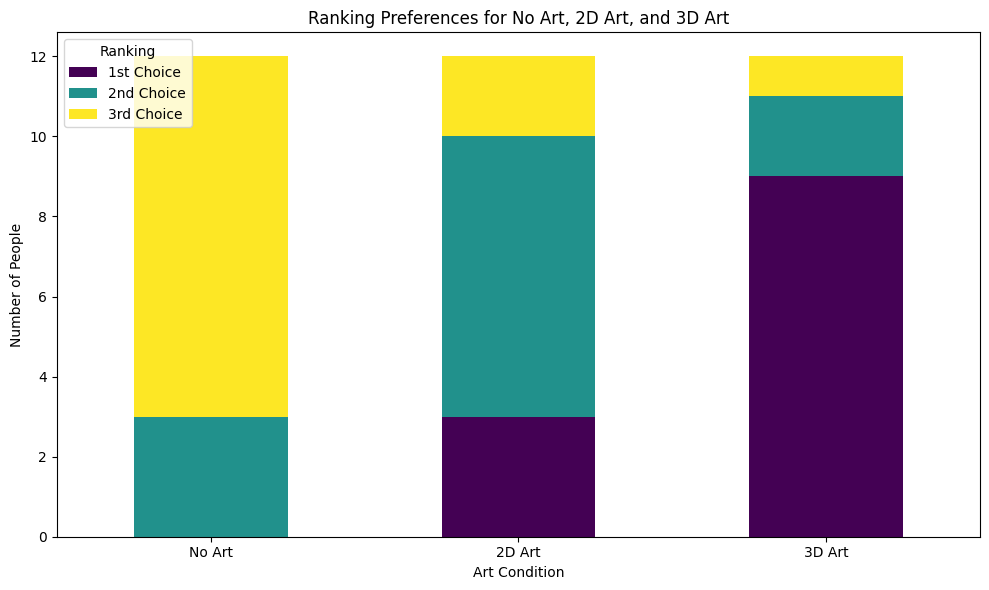

In [80]:
# Define ranking columns and corresponding art condition labels
ranking_columns = ['Q2_1', 'Q2_2', 'Q2_3']
art_labels = ['No Art', '2D Art', '3D Art']

# Convert ranking columns to numeric (handling non-numeric values)
closing_df[ranking_columns] = closing_df[ranking_columns].apply(pd.to_numeric, errors='coerce')

# Count occurrences of each ranking (1st, 2nd, 3rd choice) in each column
rank_counts = closing_df[ranking_columns].apply(lambda x: x.value_counts().reindex([1, 2, 3], fill_value=0))

# Rename index to match ranking labels
rank_counts.index = ['1st Choice', '2nd Choice', '3rd Choice']

# Plot stacked bar chart
ax = rank_counts.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels and title
ax.set_xlabel('Art Condition')
ax.set_ylabel('Number of People')
ax.set_title('Ranking Preferences for No Art, 2D Art, and 3D Art')

# Set x-axis labels
ax.set_xticklabels(art_labels, rotation=0)

# Add legend
ax.legend(title='Ranking')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Stacked bar graphs for the ranking of locations

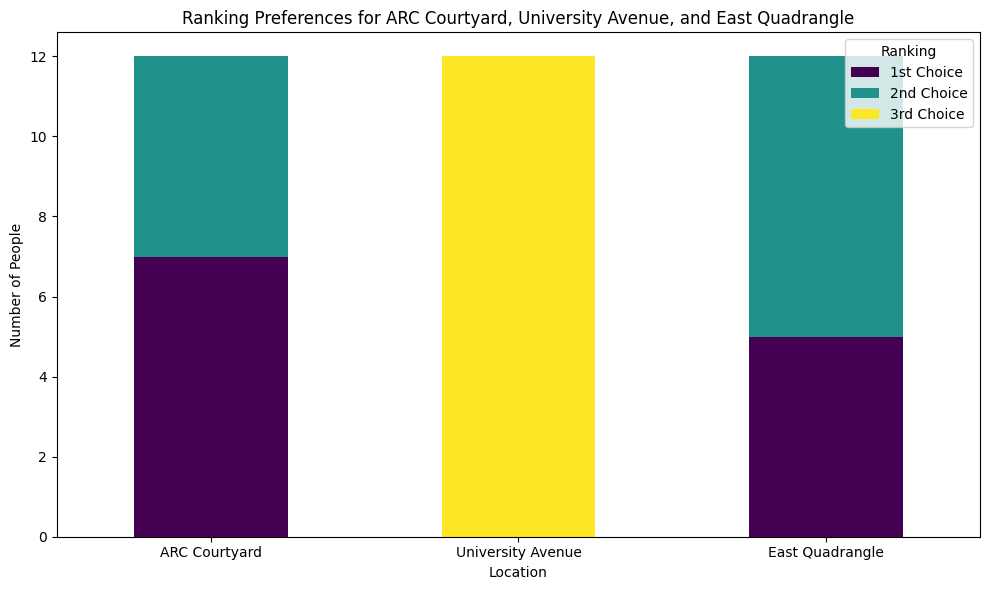

In [81]:
# Define ranking columns and corresponding location labels
ranking_columns = ['Q3_1', 'Q3_2', 'Q3_3']
location_labels = ['ARC Courtyard', 'University Avenue', 'East Quadrangle']

# Convert ranking columns to numeric (handling non-numeric values)
closing_df[ranking_columns] = closing_df[ranking_columns].apply(pd.to_numeric, errors='coerce')

# Count occurrences of each ranking (1st, 2nd, 3rd choice) in each column
rank_counts = closing_df[ranking_columns].apply(lambda x: x.value_counts().reindex([1, 2, 3], fill_value=0))

# Rename index to match ranking labels
rank_counts.index = ['1st Choice', '2nd Choice', '3rd Choice']

# Plot stacked bar chart
ax = rank_counts.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels and title
ax.set_xlabel('Location')
ax.set_ylabel('Number of People')
ax.set_title('Ranking Preferences for ARC Courtyard, University Avenue, and East Quadrangle')

# Set x-axis labels
ax.set_xticklabels(location_labels, rotation=0)

# Add legend
ax.legend(title='Ranking')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Stacked bar graph for the ranking of all conditions

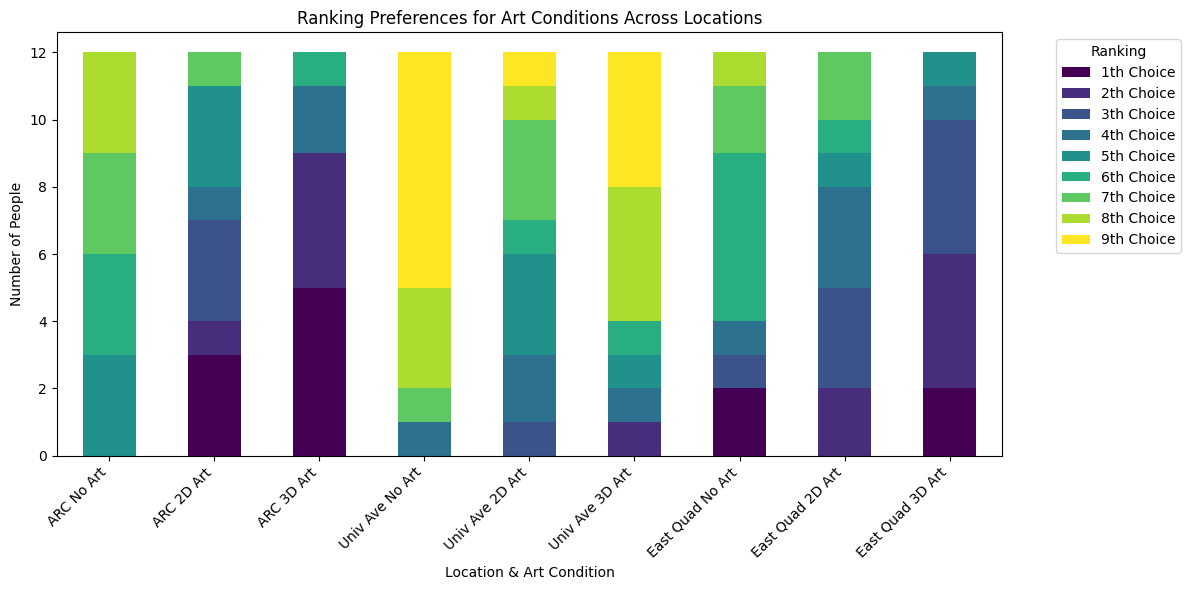

In [82]:
# Define ranking columns and corresponding labels
ranking_columns = ['Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9']
location_labels = [
    'ARC No Art', 'ARC 2D Art', 'ARC 3D Art',
    'Univ Ave No Art', 'Univ Ave 2D Art', 'Univ Ave 3D Art',
    'East Quad No Art', 'East Quad 2D Art', 'East Quad 3D Art'
]

# Convert ranking columns to numeric (handling non-numeric values)
closing_df[ranking_columns] = closing_df[ranking_columns].apply(pd.to_numeric, errors='coerce')

# Count occurrences of each ranking (1 to 9)
valid_ranks = list(range(1, 10))  # Includes all ranks 1 to 9
rank_counts = closing_df[ranking_columns].apply(lambda x: x.value_counts().reindex(valid_ranks, fill_value=0))

# Rename index for clarity
rank_counts.index = [f'{i}th Choice' for i in valid_ranks]

# Plot stacked bar chart
ax = rank_counts.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Add labels and title
ax.set_xlabel('Location & Art Condition')
ax.set_ylabel('Number of People')
ax.set_title('Ranking Preferences for Art Conditions Across Locations')

# Set x-axis labels
ax.set_xticklabels(location_labels, rotation=45, ha='right')

# Add legend
ax.legend(title='Ranking', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show plot
plt.tight_layout()
plt.show()